# 0627 1차 수행평가

## 가상 직업체험1 - 데이터 라벨링

- LOG_DATA.csv
- column중 'P_TIME'이 20보다 크면 장애
- 이진분류 : 장애가 있으면 0, 없으면 1

- 라벨링을 해서 별도로 파일에 값을 붙일 필요는 없고 코드 출력만 하면 됨

In [1]:
import pandas as pd
import numpy as np

log_data = pd.read_csv("C:/Users/Affinity/Desktop/개인자료/module3/LOG_DATA.csv")

In [2]:
log_data.tail(5)

# 총 데이터가 43229개...

,MASTERLOG_ID,MSG_DATETIME,MSG_STATUS,HUB_CNT,SPOKE_CNT,RECV_HUB_CNT,RECV_SPOKE_CNT,ERROR_TYPE,ERROR_CNT,REASON_CODE,...,COMPRESS_SIZE,SOURCE_DIR_NM,SOURCE_FILE_NM,TARGET_DIR_NM,TARGET_FILE_NM,RECORD_S_CNT,RECORD_E_CNT,P_TIME,GLOBAL_ID,RECV_HOST_ID
43225,19,20181130235727200000,0,0,1,1,1,NaN,0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,00:26.5,NaN,NaN
43226,19,20181130235748100000,0,0,1,1,1,NaN,0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,00:19.6,NaN,NaN
43227,19,20181130235834100000,0,0,1,1,1,NaN,0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,00:22.0,NaN,NaN
43228,19,20181130235853100000,0,0,1,1,1,NaN,0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,00:25.8,NaN,NaN
43229,19,20181130235933400000,0,0,1,1,1,NaN,0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,00:15.1,NaN,NaN


In [3]:
log_data.shape

(43230, 27)

### 1. DataSet 분류

    - 주어진 csv 중 P_TIME column만 가져와서 쓸거임
    - P_TIME만 떼내서 새로운 DataFrame 에 넣음
    - 리스트 형태로 넣기
    - 리스트 형태로 넣고, dtype 을 확인 (unique)
    
    - P_TIME 에서 NaN 값이 있으면 안되니까 NaN 값은 미리 제거한다 (dropna)  

In [4]:
# 새로운 DataFrame 만들기
df = log_data[["P_TIME"]]

# unique 로 dtype 확인
df["P_TIME"].unique() # object type

array(['00:01.8', '00:08.1', '00:17.3', '00:06.8', '00:10.4', '00:06.2',
       '00:11.0', '00:13.9', '00:09.7', '00:08.9', '00:14.0', '00:11.1',
       '00:10.7', '00:06.6', '00:17.5', '00:13.5', '00:11.8', '00:01.6',
       '00:13.4', '00:09.1', '00:07.8', '00:13.1', '00:04.7', '00:07.3',
       '00:10.6', '00:09.8', '00:11.3', '00:15.6', '00:16.6', '00:16.5',
       '00:11.2', '00:18.5', '00:10.5', '00:07.1', '00:09.0', '00:02.9',
       '00:05.2', '00:17.2', '00:03.7', '00:15.1', '00:05.7', '00:17.6',
       '00:12.9', '00:09.2', '00:12.8', '00:11.7', '00:12.1', '00:12.5',
       '00:05.0', '00:12.2', '00:06.0', '00:06.3', '00:14.7', '00:12.4',
       '00:12.0', '00:13.3', '00:14.4', '00:09.3', '00:14.9', '00:09.5',
       '00:10.2', '00:15.7', '00:13.2', '00:03.4', '00:04.4', '00:02.8',
       '00:07.5', '00:08.7', '00:05.8', '00:07.4', '00:10.8', '00:02.0',
       '00:14.8', '00:09.4', '00:11.9', '00:07.7', '00:07.9', '00:16.4',
       '00:16.2', '00:08.3', '00:11.5', '00:07.0', 

In [5]:
# NaN이 있는 열 제거
df.dropna(axis=1)

,P_TIME
0,00:01.8
1,00:08.1
2,00:17.3
3,00:06.8
4,00:10.4
5,00:06.2
6,00:11.0
7,00:13.9
8,00:09.7
9,00:08.9


### 2. P_TIME의 장애여부로 0,1로 이진분류

    - 20 이상이면 0, 20 미만이면 1로 분류해서 DataFrame 에 저장
    - 요구사항에 파일에 붙일 필요는 없다고 했기 때문에, 그냥 DataFrame 만 출력해보이면 끝
    
    - 현재 df 에는 P_TIME 열만 있으니까, (0,1) 을 구분하는 별도의 label 을 하나 생성하자
    - 나는 이걸 is_obstacle 로 하겠음
    
    - 근데 object type 이라서 비교연산이 안될테니까, 형변환을 먼저 하고 시작
   

In [85]:
# 이제 20보다 크다 작다로 분류하고, dataFrame 에 저장하자

df['is_obstacle'] = np.nan

df['is_obstacle'] = df['P_TIME'].apply(lambda x: 0 if float(x[0]) >= 20 else 1)
df

C:\ProgramData\Anaconda3\envs\ywpython\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\ProgramData\Anaconda3\envs\ywpython\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,P_TIME,is_obstacle
0,00:01.8,1
1,00:08.1,1
2,00:17.3,1
3,00:06.8,1
4,00:10.4,1
5,00:06.2,1
6,00:11.0,1
7,00:13.9,1
8,00:09.7,1
9,00:08.9,1


In [92]:
df['P_TIME'].replace('00:', '', inplace=True)

## 가상 직업체험2 - 시계열 예측 그림 plot

- https://tinyurl.com/y4ulxybm!
- Quick Start 부분만 따라 수행


- 위 블로그 링크에서 쓰인 예제 파일을 찾아서... 어떻게 나오는지 한번 먼저 보자
- question2.csv 로 저장하겠음

In [39]:
# 데이터를 불러오고 y 변수를 log-transform 하기

import pandas as pd
import numpy as np
from fbprophet import Prophet

df3 = pd.read_csv("C:/Users/Affinity/Desktop/개인자료/module3/question2.csv")
df3['y'] = np.log(df3['y'])
df3.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [40]:
# 새로운 Prophet 오브젝트를 만들어 모형 적합시키기

m = Prophet()
m.fit(df3);

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\ProgramData\Anaconda3\envs\ywpython\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [41]:
# 예측값이 데이터프레임 날짜에 맞춰서 행 ds에 생성됨.

future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [42]:
# predict 메소드는 각 열을 yhat 이름에 예측된 값인 future 안에 배치함

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.212357,7.442894,8.939795
3266,2017-01-16,8.537370,7.805633,9.256329
3267,2017-01-17,8.324799,7.592038,9.002028
3268,2017-01-18,8.157470,7.386844,8.854090
3269,2017-01-19,8.169412,7.403798,8.904862


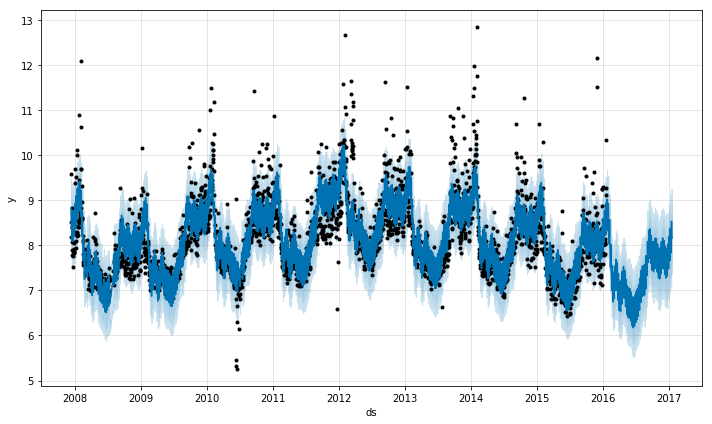

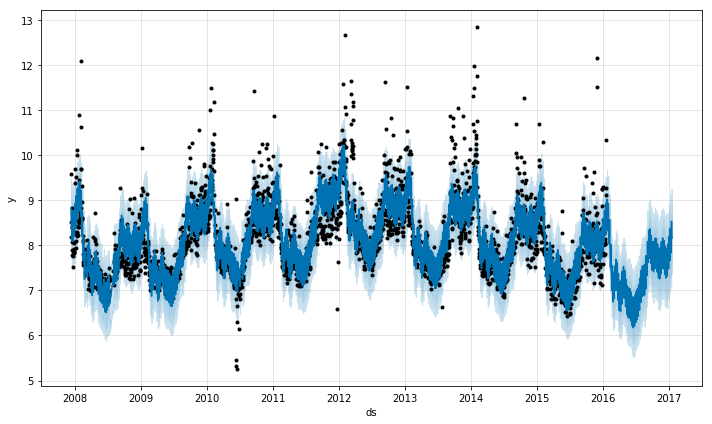

In [43]:
m.plot(forecast)

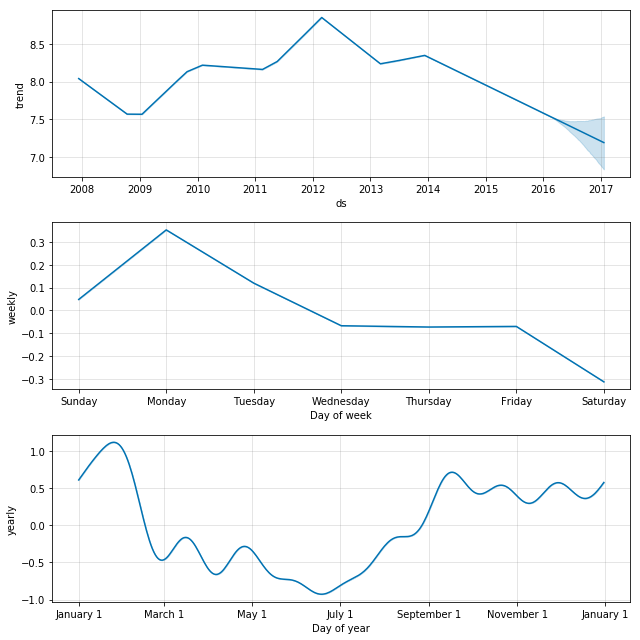

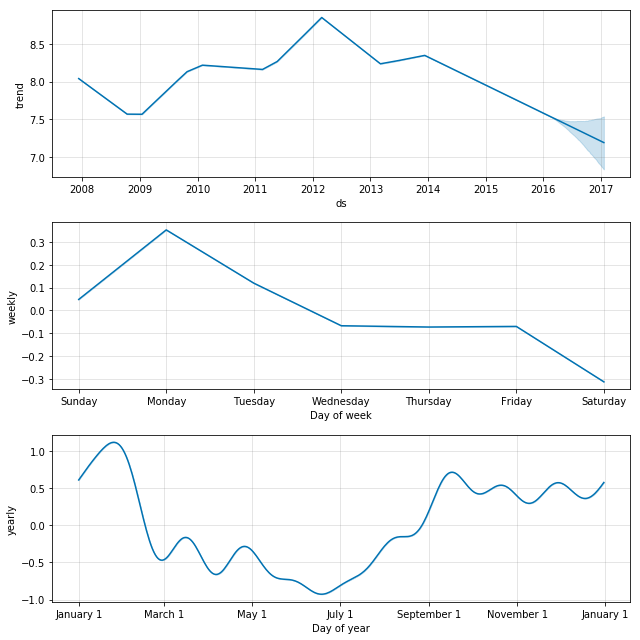

In [44]:
m.plot_components(forecast)

##### 가지고있는 LOG_DATA.csv 파일로 하면?

    - 우선 해당 파일을 열어보면, 라벨들 중 변하는 값을 가진 라벨이
    - MSG_DATETIME, MSG_TTS, P_TIME 이 세가지밖에 없음
    - MSG_TTS 라벨은 날짜값이 전부 똑같음
    - MSG_DATETIME 을 보면... 2018-11-01- 그 다음에 숫자들이 시간데이터 인것 같다.
    
    - 엑셀에서 텍스트 나누기로, MSG_DATETIME 을 날짜 / 시간으로 분류하고 한번 다시 실행해보자.
    
    - LOG_DATA2.csv 로 저장하겠음
    - MSG_DATETIME 을 2018-11-01 / 이걸 ds 로 놓고
    - y = ds 뒤에 시간값으로 (초단위로 보이는 부분까진 살리고, 뒤에 필요없는 0000 값은 버리기)
    
    - Prophet 이 ds, y 라벨이 반드시 필요하다고 나와서, 엑셀 라벨이름도 바꿔줌

In [70]:
df4 = pd.read_csv("C:/Users/Affinity/Desktop/개인자료/module3/LOG_DATA2.csv")
df4.rename(columns={'MSG_DATETIME2' : 'ds', 'TIME' : 'y'})

,MASTERLOG_ID,MSG_DATETIME,ds,y,NA,SPOKE_CNT,RECV_HUB_CNT,RECV_SPOKE_CNT,ERROR_TYPE,ERROR_CNT,...,COMPRESS_SIZE,SOURCE_DIR_NM,SOURCE_FILE_NM,TARGET_DIR_NM,TARGET_FILE_NM,RECORD_S_CNT,RECORD_E_CNT,P_TIME,GLOBAL_ID,RECV_HOST_ID
0,19,2.018110e+19,20181101,1256,0,1,1,1,NaN,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,00:01.8,NaN,NaN
1,19,2.018110e+19,20181101,1430,0,1,1,1,NaN,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,00:08.1,NaN,NaN
2,19,2.018110e+19,20181101,1447,0,1,1,1,NaN,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,00:17.3,NaN,NaN
3,19,2.018110e+19,20181101,2412,0,1,1,1,NaN,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,00:06.8,NaN,NaN
4,19,2.018110e+19,20181101,2486,0,1,1,1,NaN,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,00:10.4,NaN,NaN
5,19,2.018110e+19,20181101,8172,0,1,1,1,NaN,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,00:06.2,NaN,NaN
6,19,2.018110e+19,20181101,8233,0,1,1,1,NaN,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,00:11.0,NaN,NaN
7,19,2.018110e+19,20181101,9552,0,1,1,1,NaN,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,00:13.9,NaN,NaN
8,19,2.018110e+19,20181101,14038,0,1,1,1,NaN,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,00:09.7,NaN,NaN
9,19,2.018110e+19,20181101,15284,0,1,1,1,NaN,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,00:08.9,NaN,NaN


In [71]:
df4['y'] = np.log(df4['y'])
df4.head()

,MASTERLOG_ID,MSG_DATETIME,ds,y,NA,SPOKE_CNT,RECV_HUB_CNT,RECV_SPOKE_CNT,ERROR_TYPE,ERROR_CNT,...,COMPRESS_SIZE,SOURCE_DIR_NM,SOURCE_FILE_NM,TARGET_DIR_NM,TARGET_FILE_NM,RECORD_S_CNT,RECORD_E_CNT,P_TIME,GLOBAL_ID,RECV_HOST_ID
0,19,2.018110e+19,20181101,7.135687,0,1,1,1,NaN,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,00:01.8,NaN,NaN
1,19,2.018110e+19,20181101,7.265430,0,1,1,1,NaN,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,00:08.1,NaN,NaN
2,19,2.018110e+19,20181101,7.277248,0,1,1,1,NaN,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,00:17.3,NaN,NaN
3,19,2.018110e+19,20181101,7.788212,0,1,1,1,NaN,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,00:06.8,NaN,NaN
4,19,2.018110e+19,20181101,7.818430,0,1,1,1,NaN,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,00:10.4,NaN,NaN


In [62]:
m2 = Prophet()
m2.fit(df4);

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\ProgramData\Anaconda3\envs\ywpython\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [63]:
# LOG_DATA의 MSG_DATETIME 이 11월 1일부터 11월 30일까지 있음
# periods 를 30일로 잡겠음

future2 = m2.make_future_dataframe(periods=30)
future2.tail()

# 데이터 날짜 값이 잘못 잡히는것 같은데 원인은 찾으면 기술

,ds
43255,1970-01-27 00:00:00.020181130
43256,1970-01-28 00:00:00.020181130
43257,1970-01-29 00:00:00.020181130
43258,1970-01-30 00:00:00.020181130
43259,1970-01-31 00:00:00.020181130


In [64]:
forecast2 = m2.predict(future2)
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,1970-01-01 00:00:00.020181101,52.738885,51.254894,54.105652
1,1970-01-01 00:00:00.020181101,52.738885,51.294741,54.197011
2,1970-01-01 00:00:00.020181101,52.738885,51.362194,54.143079
3,1970-01-01 00:00:00.020181101,52.738885,51.442312,54.189999
4,1970-01-01 00:00:00.020181101,52.738885,51.323115,54.115697


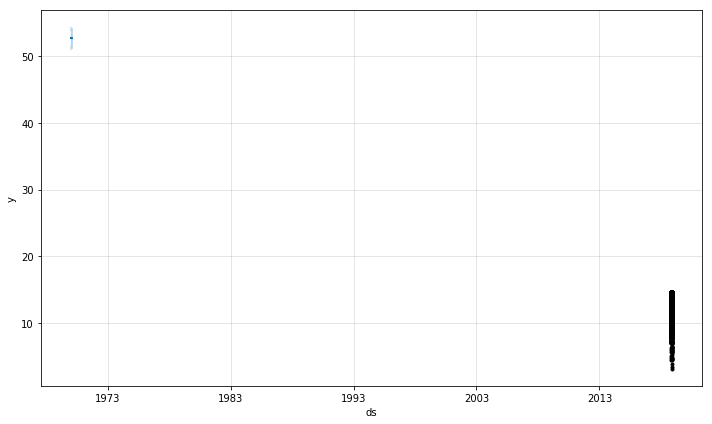

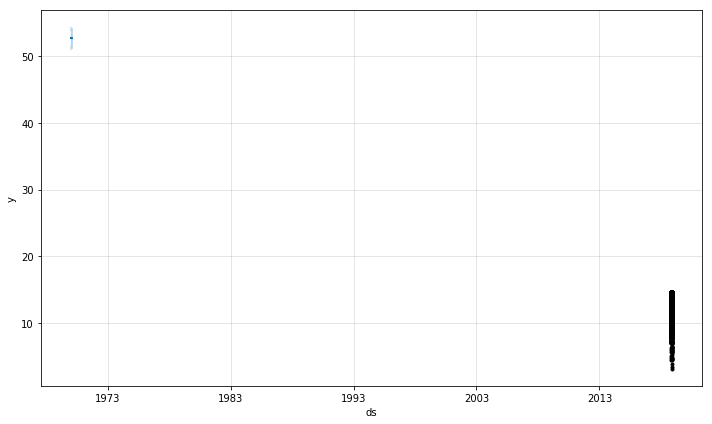

In [69]:
m2.plot(forecast2)

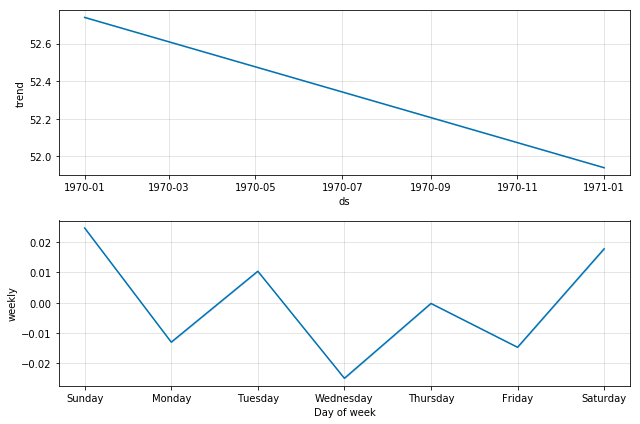

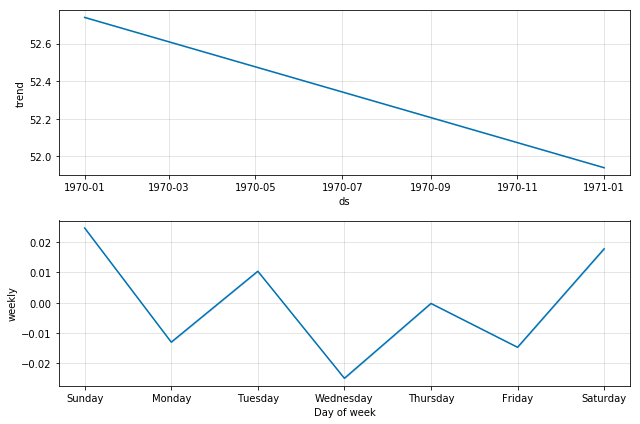

In [51]:
m2.plot_components(forecast2)

## 가상 직업체험3 - kaggle - 산탄데르 은행 추천 EDA

- 유사한 고객군의 데이터를 기반으로 다음달에 고객이 무슨 제품을 사용할지 예측

- train_ver2.csv 파일로

In [104]:
# 일단 파일 불러오기
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
train_data = pd.read_csv("C:/Users/Affinity/Desktop/개인자료/module3/train_ver2.csv")
train_data.head(15)

C:\ProgramData\Anaconda3\envs\ywpython\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning:

Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.



,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
5,2015-01-28,1050615,N,ES,H,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
6,2015-01-28,1050616,N,ES,H,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
7,2015-01-28,1050617,N,ES,H,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
8,2015-01-28,1050619,N,ES,H,24,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
9,2015-01-28,1050620,N,ES,H,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [54]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13647309 entries, 0 to 13647308
Data columns (total 48 columns):
fecha_dato               object
ncodpers                 int64
ind_empleado             object
pais_residencia          object
sexo                     object
age                      object
fecha_alta               object
ind_nuevo                float64
antiguedad               object
indrel                   float64
ult_fec_cli_1t           object
indrel_1mes              object
tiprel_1mes              object
indresi                  object
indext                   object
conyuemp                 object
canal_entrada            object
indfall                  object
tipodom                  float64
cod_prov                 float64
nomprov                  object
ind_actividad_cliente    float64
renta                    float64
segmento                 object
ind_ahor_fin_ult1        int64
ind_aval_fin_ult1        int64
ind_cco_fin_ult1         int64
ind_cder_fin_ult1  

##### 우선 저 데이터들을 전처리해야함

    - https://github.com/zzsza/Kaggle_Santander-Product-Recommendation/blob/master/notebook/01.%20EDA.ipynb 참조
    
    - 숫자형 / 카테고리형 두 분류로 나눠서 라벨들을 살펴보고
    - 중복된 값 / 문자로 변형되지 않은 값 / NaN값을 지울건지 0으로 둘건지?
    - 부터 처리하기

In [106]:
# 숫자형 라벨 데이터
num_cols = ['ncodpers','ind_nuevo','indrel','tipodom', \
            'cod_prov','ind_actividad_cliente','renta', \
            'age','antiguedad']
print(train_data[num_cols].describe())

           ncodpers     ind_nuevo        indrel     tipodom      cod_prov  \
count  1.364731e+07  1.361958e+07  1.361958e+07  13619574.0  1.355372e+07   
mean   8.349042e+05  5.956184e-02  1.178399e+00         1.0  2.657147e+01   
std    4.315650e+05  2.366733e-01  4.177469e+00         0.0  1.278402e+01   
min    1.588900e+04  0.000000e+00  1.000000e+00         1.0  1.000000e+00   
25%    4.528130e+05  0.000000e+00  1.000000e+00         1.0  1.500000e+01   
50%    9.318930e+05  0.000000e+00  1.000000e+00         1.0  2.800000e+01   
75%    1.199286e+06  0.000000e+00  1.000000e+00         1.0  3.500000e+01   
max    1.553689e+06  1.000000e+00  9.900000e+01         1.0  5.200000e+01   

       ind_actividad_cliente         renta  
count           1.361958e+07  1.085293e+07  
mean            4.578105e-01  1.342543e+05  
std             4.982169e-01  2.306202e+05  
min             0.000000e+00  1.202730e+03  
25%             0.000000e+00  6.871098e+04  
50%             0.000000e+00  1.0185

In [107]:
# 카테고리형 라벨 데이터
cat_cols = ['fecha_dato','ind_empleado','pais_residencia', \
            'sexo','fecha_alta','ult_fec_cli_1t','indrel_1mes', \
            'tiprel_1mes','indresi','indext','conyuemp', \
            'canal_entrada','indfall','nomprov','segmento']

for col in cat_cols:
    uniq =np.unique(train_data[col].astype(str)) 
    print ('-'*50)
    print ('# col {}\t n_uniq {}\t unique {}'.format(col, len(uniq), uniq))

--------------------------------------------------
# col fecha_dato	 n_uniq 17	 unique ['2015-01-28' '2015-02-28' '2015-03-28' '2015-04-28' '2015-05-28'
 '2015-06-28' '2015-07-28' '2015-08-28' '2015-09-28' '2015-10-28'
 '2015-11-28' '2015-12-28' '2016-01-28' '2016-02-28' '2016-03-28'
 '2016-04-28' '2016-05-28']
--------------------------------------------------
# col ind_empleado	 n_uniq 6	 unique ['A' 'B' 'F' 'N' 'S' 'nan']
--------------------------------------------------
# col pais_residencia	 n_uniq 119	 unique ['AD' 'AE' 'AL' 'AO' 'AR' 'AT' 'AU' 'BA' 'BE' 'BG' 'BM' 'BO' 'BR' 'BY'
 'BZ' 'CA' 'CD' 'CF' 'CG' 'CH' 'CI' 'CL' 'CM' 'CN' 'CO' 'CR' 'CU' 'CZ'
 'DE' 'DJ' 'DK' 'DO' 'DZ' 'EC' 'EE' 'EG' 'ES' 'ET' 'FI' 'FR' 'GA' 'GB'
 'GE' 'GH' 'GI' 'GM' 'GN' 'GQ' 'GR' 'GT' 'GW' 'HK' 'HN' 'HR' 'HU' 'IE'
 'IL' 'IN' 'IS' 'IT' 'JM' 'JP' 'KE' 'KH' 'KR' 'KW' 'KZ' 'LB' 'LT' 'LU'
 'LV' 'LY' 'MA' 'MD' 'MK' 'ML' 'MM' 'MR' 'MT' 'MX' 'MZ' 'NG' 'NI' 'NL'
 'NO' 'NZ' 'OM' 'PA' 'PE' 'PH' 'PK' 'PL' 'PR' 'PT' '

In [109]:
# 공백 ,NaN 값이 있는지 검사

col = 'age'
print(np.unique(train_data[col].astype(str)))
print(train_data[col].value_counts())

'''
26     250641
 23    237202
43     231501

중간중간에 공백있음
'''

['  2' '  3' '  4' '  5' '  6' '  7' '  8' '  9' ' 10' ' 11' ' 12' ' 13'
 ' 14' ' 15' ' 16' ' 17' ' 18' ' 19' ' 20' ' 21' ' 22' ' 23' ' 24' ' 25'
 ' 26' ' 27' ' 28' ' 29' ' 30' ' 31' ' 32' ' 33' ' 34' ' 35' ' 36' ' 37'
 ' 38' ' 39' ' 40' ' 41' ' 42' ' 43' ' 44' ' 45' ' 46' ' 47' ' 48' ' 49'
 ' 50' ' 51' ' 52' ' 53' ' 54' ' 55' ' 56' ' 57' ' 58' ' 59' ' 60' ' 61'
 ' 62' ' 63' ' 64' ' 65' ' 66' ' 67' ' 68' ' 69' ' 70' ' 71' ' 72' ' 73'
 ' 74' ' 75' ' 76' ' 77' ' 78' ' 79' ' 80' ' 81' ' 82' ' 83' ' 84' ' 85'
 ' 86' ' 87' ' 88' ' 89' ' 90' ' 91' ' 92' ' 93' ' 94' ' 95' ' 96' ' 97'
 ' 98' ' 99' ' NA' '10' '100' '101' '102' '103' '104' '105' '106' '107'
 '108' '109' '11' '110' '111' '112' '113' '114' '115' '116' '117' '12'
 '126' '127' '13' '14' '15' '16' '163' '164' '17' '18' '19' '2' '20' '21'
 '22' '23' '24' '25' '26' '27' '28' '29' '3' '30' '31' '32' '33' '34' '35'
 '36' '37' '38' '39' '4' '40' '41' '42' '43' '44' '45' '46' '47' '48' '49'
 '5' '50' '51' '52' '53' '54' '55' '56' '57' '58'

In [110]:
col = 'antiguedad'
print(np.unique(train_data[col].astype(str)))
print(train_data[col].value_counts())

'''
253           416
    245       360
254           261
255           179
      0       149
256           102
-999999        26
-999999        12

공백값 NaN값
'''

['      0' '      1' '      2' '      3' '      4' '      5' '      6'
 '      7' '      8' '      9' '     10' '     11' '     12' '     13'
 '     14' '     15' '     16' '     17' '     18' '     19' '     20'
 '     21' '     22' '     23' '     24' '     25' '     26' '     27'
 '     28' '     29' '     30' '     31' '     32' '     33' '     34'
 '     35' '     36' '     37' '     38' '     39' '     40' '     41'
 '     42' '     43' '     44' '     45' '     46' '     47' '     48'
 '     49' '     50' '     51' '     52' '     53' '     54' '     55'
 '     56' '     57' '     58' '     59' '     60' '     61' '     62'
 '     63' '     64' '     65' '     66' '     67' '     68' '     69'
 '     70' '     71' '     72' '     73' '     74' '     75' '     76'
 '     77' '     78' '     79' '     80' '     81' '     82' '     83'
 '     84' '     85' '     86' '     87' '     88' '     89' '     90'
 '     91' '     92' '     93' '     94' '     95' '     96' '     97'
 '    

In [111]:
# age 부분 전처리
col = 'age'
train_data[col].replace(' NA',0,inplace=True)
train_data[col] = train_data[col].astype(int)

In [112]:
# 연차 전처리
col = 'antiguedad'
train_data[col].replace('     NA',-2,inplace=True)
train_data[col] = train_data[col].astype(int)
train_data[col].replace(-999999,-1,inplace=True)

col :  age


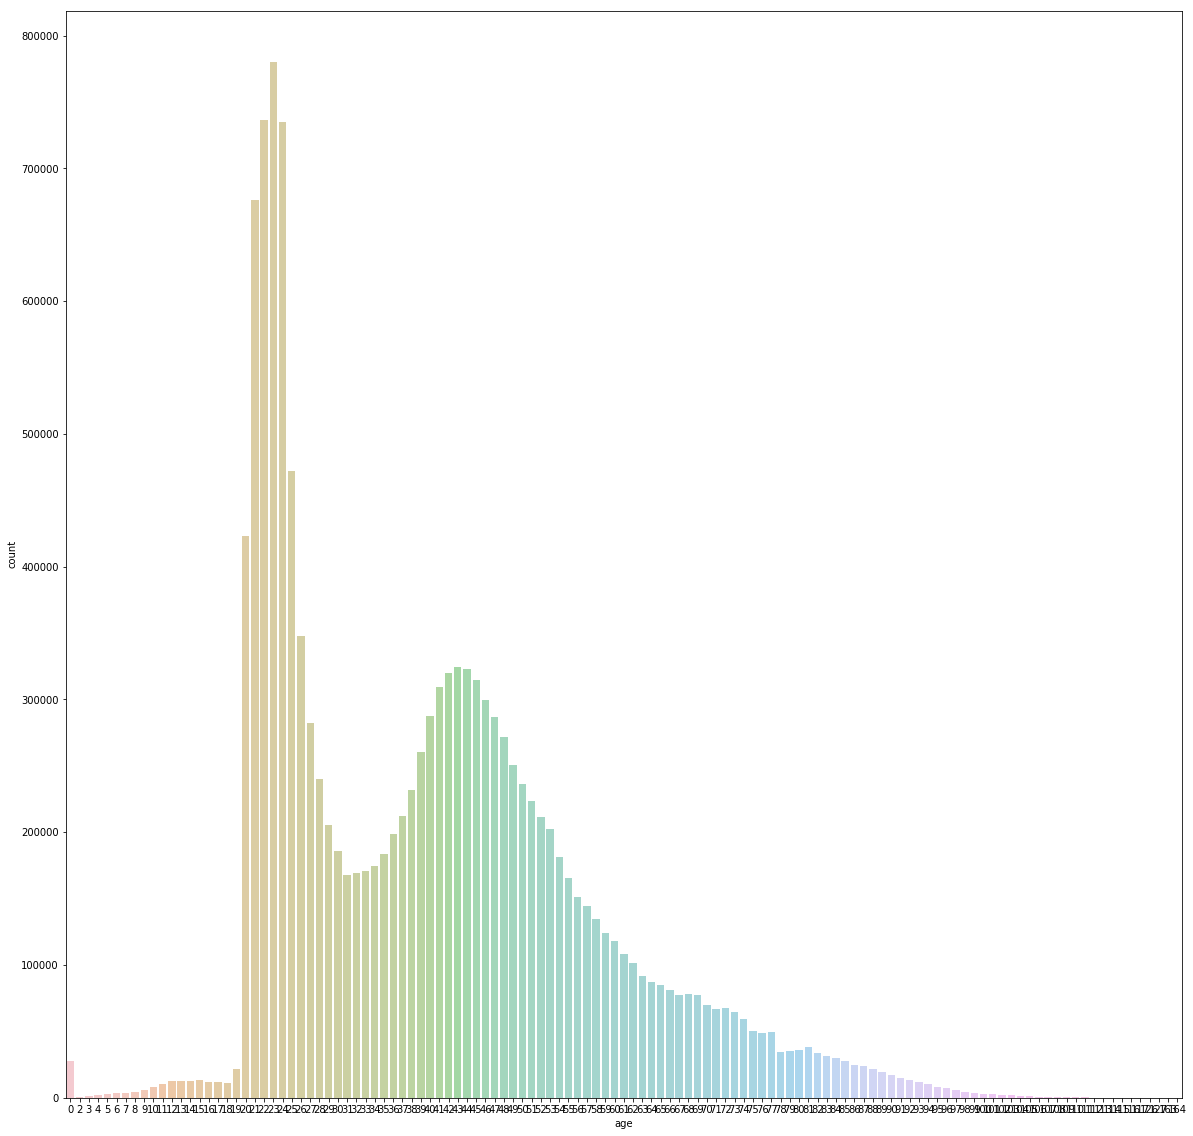

col :  antiguedad


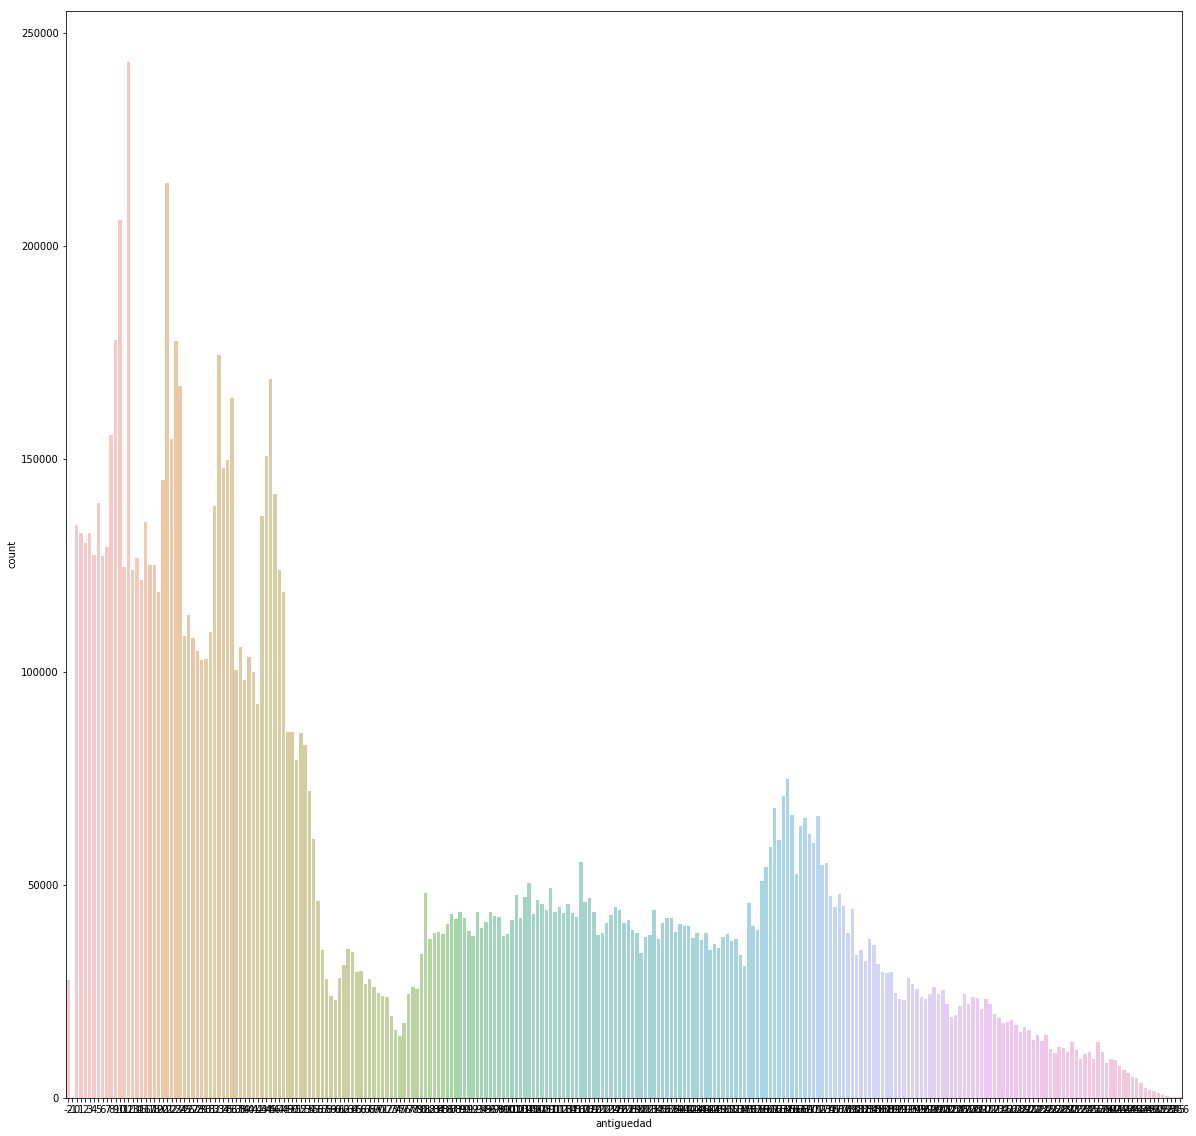

In [113]:
# 전처리 두개만 해보고 출력해봐서 나오는지 안나오는지
cols = ['age','antiguedad']
for col in cols:
    print('='*50)
    print('col : ', col)
    f, ax = plt.subplots(figsize=(20, 20))
    sns.countplot(x=col, data=train_data, alpha=0.5)
    plt.show()